In [52]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow

## **Part-1**

### **Question-1**

a) Create a numpy array from the Image object. You can read an image using PIL and
convert it to numpy array.

In [2]:
img_data = Image.open('img.jpg')
img_arr = np.array(img_data) 
print(img_arr)

[[[  4  43   0]
  [ 39  78  31]
  [ 35  77  27]
  ...
  [110 113  60]
  [ 13  20   0]
  [  0   7   0]]

 [[ 11  46   4]
  [ 18  55  11]
  [  6  45   0]
  ...
  [175 176 118]
  [103 110  59]
  [ 49  58  13]]

 [[  0  29   0]
  [  0  17   0]
  [  0  14   0]
  ...
  [189 190 114]
  [ 87  92  25]
  [ 81  91  28]]

 ...

 [[106  93  59]
  [ 35  24   0]
  [ 14   3   0]
  ...
  [ 53  57  34]
  [ 51  55  32]
  [ 50  54  31]]

 [[134 121  87]
  [ 42  31   1]
  [ 43  31   9]
  ...
  [ 49  53  30]
  [ 48  52  29]
  [ 47  51  28]]

 [[ 92  79  44]
  [ 65  52  20]
  [111  99  75]
  ...
  [ 46  50  27]
  [ 46  50  27]
  [ 46  50  27]]]


b) Reverse: Convert from numpy array into a PIL Image object.

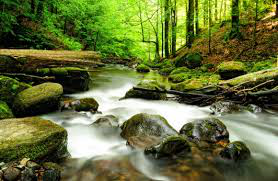

In [3]:
im = Image.fromarray(img_arr)
im

### **Question 2**

Converting from one file format to another. Read an image in one file format and
save it to another: for example, from PNG to JPG.

In [4]:
img = Image.open("img.jpg")
img.save("img.png")

### **Question 3: Take any RGB image as input and crop that image. Show input**

a) Using direct function in Python

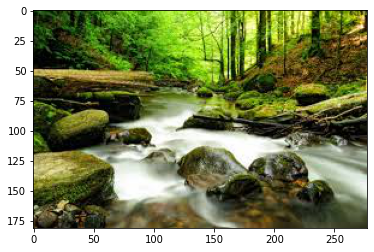

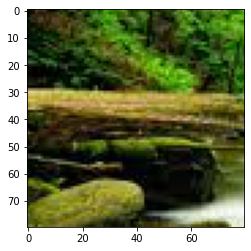

In [5]:
img = Image.open("img.jpg")
plt.figure()
plt.imshow(img)
(left, upper, right, lower) = (20, 20, 100, 100)
img_crop = img.crop((left, upper, right, lower))
plt.figure()
plt.imshow(img_crop)

b) Write your program using arrays and matrices. This is required to make you
familiar with images and their dimensions

(80, 80, 3)

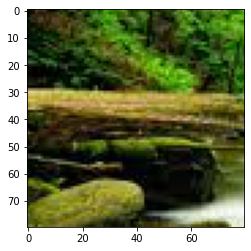

In [6]:
img_data = Image.open('img.jpg')
crop = np.array(img_data)
cropped=crop[20:100,20:100,:]
plt.imshow(cropped)
cropped.shape

### **Question 4. Negative of an image**

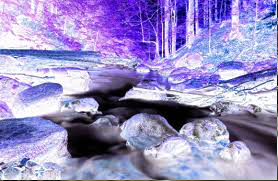

In [7]:
img = Image.open("img.jpg");

for i in range(0, img.size[0]-1):

    for j in range(0, img.size[1]-1):
      
        pixelColorVals = img.getpixel((i,j))

        redPixel    = 255 - pixelColorVals[0]
        greenPixel  = 255 - pixelColorVals[1]
        bluePixel   = 255 - pixelColorVals[2]

        img.putpixel((i,j),(redPixel, greenPixel, bluePixel))
        
img

### **Question 5. Creating a circular mask on the input image**

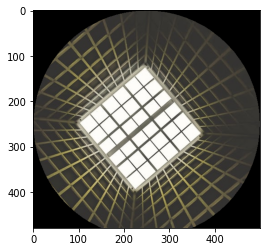

In [8]:
img = cv2.imread('sq0.jpg', 1)
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

temp = np.zeros_like(img_color, dtype=np.uint8)
circle = cv2.circle(temp, (250, 250), 450, (255,255,255), 400)

newimg= cv2.subtract(img_color, circle)
plt.imshow(newimg)

### **6. Reading and displaying multiple images at once**

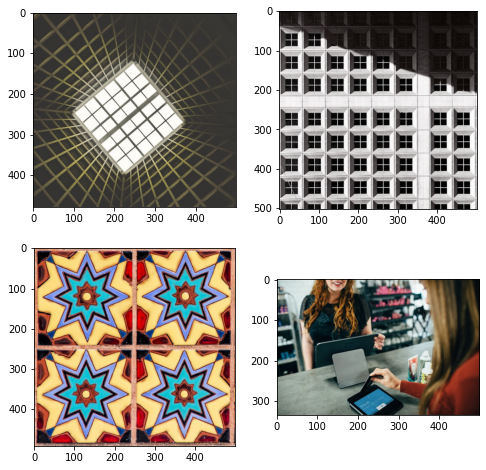

In [9]:
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(Image.open("sq{}.jpg".format(i-1)))
plt.show()

### **7. Create a thumbnail**

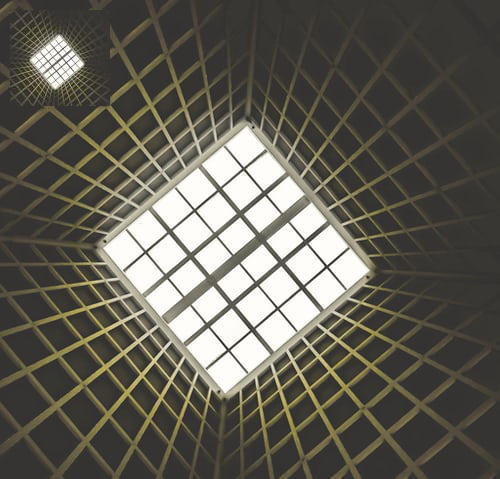

In [10]:
image = Image.open("sq0.jpg") 
MAX_SIZE = (100, 100)  
image.thumbnail(MAX_SIZE) 

image.save('thumb.jpg')
thumb = Image.open("thumb.jpg")
image1 = Image.open("sq0.jpg") 
image1.paste(thumb,(10,10))
image1

### **8. Drawing on an image in Python**

a) You can draw lines or other geometric shapes on an image

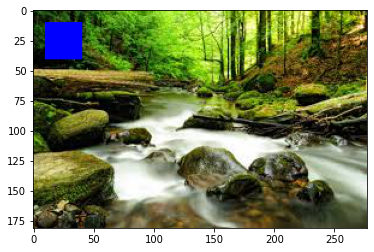

In [16]:
with Image.open("img.jpg") as im:

    draw = ImageDraw.Draw(im)
    draw.rectangle([10,10,40,40],fill="blue")
plt.imshow(im)

b) Drawing text on an image

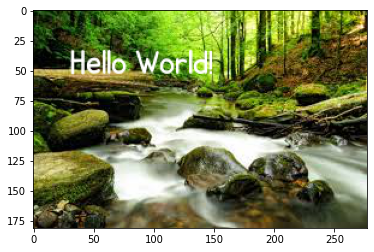

In [23]:
with Image.open("img.jpg") as im:

    draw = ImageDraw.Draw(im)
    fnt = ImageFont.truetype('Childrensans-7BOGR.ttf', 30)
    draw.text([30,30],"Hello World!",font=fnt)
plt.imshow(im)

### **9. R,G,B channels splitting and merging**

In [57]:
im = Image.open(r"img.jpg") 

im1 = Image.Image.split(im) 

print(np.array(im1[0]))
print(np.array(im1[1]))
print(np.array(im1[2]))
# im1[0].save("r.jpg") 
# im1[1].save("g.jpg") 
# im1[2].save("b.jpg")

[[  4  39  35 ... 110  13   0]
 [ 11  18   6 ... 175 103  49]
 [  0   0   0 ... 189  87  81]
 ...
 [106  35  14 ...  53  51  50]
 [134  42  43 ...  49  48  47]
 [ 92  65 111 ...  46  46  46]]
[[ 43  78  77 ... 113  20   7]
 [ 46  55  45 ... 176 110  58]
 [ 29  17  14 ... 190  92  91]
 ...
 [ 93  24   3 ...  57  55  54]
 [121  31  31 ...  53  52  51]
 [ 79  52  99 ...  50  50  50]]
[[  0  31  27 ...  60   0   0]
 [  4  11   0 ... 118  59  13]
 [  0   0   0 ... 114  25  28]
 ...
 [ 59   0   0 ...  34  32  31]
 [ 87   1   9 ...  30  29  28]
 [ 44  20  75 ...  27  27  27]]


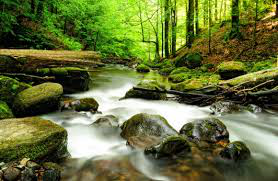

In [43]:
im2 = Image.merge( 'RGB', (im1[0], im1[1], im1[2])) 
im2